## Names: ['Mustafa Al-Tamimi', 'How Jong Lai'] 
## Studentnumbers: ['12717916', '12426083']

In [1]:
Names: ['Mustafa Al-Tamimi', 'How Jong Lai'] 
Studentnumbers: ['12717916', '12426083']

In [2]:
# Download the data
# Dataset with 10K instances
! gdown "https://drive.google.com/uc?id=1cj-CzkY6QZUe42ky64GI5CSSg7-K40N5"
# Dataset with 100k instances
! gdown "https://drive.google.com/uc?id=1MbWGXLawE3VTxP1XgNpj8uEo1VHPq12B"

zsh:1: command not found: gdown
zsh:1: command not found: gdown


### Part 1: Import the data

# Applied Machine learning
## Practical Assignment 2

### Important Notes:
1. Submit through **Canvas** before 11:59pm on Tuesday, May 17, 2022
2. No late homework will be accepted
3. This is a group-of-two assignment
4. The submitted file should be in ipynb format
5. The assignment is worth it 10 points
6. For questions, please use the discussion part of Canvas (English only!)
7. The indication **optional** means that the question is optional; you won't lose any points if you do not do that part of the assignment, nor will you gain if you do it.

### Software:
We will be using Python programming language throughout this course. Further we will be using:
+ IPython Notebooks (as an environment)
+ Numpy
+ Pandas
+ Scikit-learn

### Background:

This practical assignment will be covering logistic regression, neural networks, support vector machines and evaluation of classifiers. 

For the assignment, please download a dataset on Load Defaults. You are provided with two datasets:
1. [Dataset](https://drive.google.com/open?id=1cj-CzkY6QZUe42ky64GI5CSSg7-K40N5) with 10,000 instances 
2. [Dataset](https://drive.google.com/open?id=1MbWGXLawE3VTxP1XgNpj8uEo1VHPq12B) with 100,000 instances

In principle you should work on the second, larger dataset, but if you face scaling computational issues then better work with the first, smaller dataset.

This data corresponds to a set of financial transactions associated with individuals. The data has been standardized, de-trended, and anonymized. You are provided with thousands of observations and nearly 800 features. Each observation (instance) is independent from the previous. 

For each observation, it was recorded whether a default was triggered (i.e. whether an individual could not pay back the loan). In case of a default, the loss for the bank was measured. This quantity lies between 0 and 100. If the loan did not default, the loss for the bank was 0. You are asked to predict whether a loan will default or not for each individual in the test set.

Missing feature values have been kept as is, so that the competing teams can really use the maximum data available, implementing a strategy to fill the gaps if desired. Consider all variables continuous, even though some variables may be categorical (e.g. f776 and f777).

The goal of the machine learning algorithm will be to predict whether a loan will default, given a set of features. For privacy reasons the feature names are not provided.

**Important Note**: This second assignment is not as instructive as the first assignment. The first assignment guided you step-by-step through all the preprocessing, training-validation-testing setup, etc. This assignment does not do so, but it leaves it up to you to decide how to use the data and design your experiments.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

df = pd.read_csv('loan_default_10K.csv', sep=",", header=0, dtype=np.float64)

# Drop the observations that contain missing values
dfn = df.dropna(0, how='any')

# Consider only a handful of features to start with; you can extend to the full set later on.
X = dfn.loc[:,'f700':'f750'].values


# Generate the labels; if 'loss' is zero the this indicates the negative class, class 0, i.e. no default;
# if 'loss' is possitive this indicates the positive class, class 1, i.e. there is a loan default;
#y = [ bool(y) for y in dfn.loc[:,'loss'].values ]
dfn['loss'].mask(dfn['loss'] == 0.0, 0, inplace=True)
dfn['loss'].mask(dfn['loss'] != 0.0, 1, inplace=True)
y = np.array(dfn["loss"])


In [5]:
dfn['loss'].value_counts()

0.0    3952
1.0     415
Name: loss, dtype: int64

In [6]:

# Split the data into train, validation, and test.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20,random_state=42, stratify= y)

In [7]:
dfn

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
2,3.0,126.0,10.0,0.500080,1100.0,3.0,83607.0,1800.0,1527.0,127.76,...,13.0,2.89,-1.73,1.04,0.2521,0.7258,1.0,0.0,5.0,0.0
4,5.0,109.0,9.0,0.502749,2900.0,4.0,79124.0,89.0,491.0,122.72,...,26.0,6.11,-3.82,2.51,0.2282,-0.5399,0.0,0.0,5.0,0.0
6,7.0,121.0,9.0,0.985674,2900.0,4.0,13026.0,4565.0,263.0,126.36,...,23.0,7.06,-4.99,3.77,0.2458,-0.6732,0.0,0.0,5.0,0.0
7,8.0,128.0,9.0,0.385778,2900.0,4.0,79244.0,6597.0,3592.0,127.19,...,17.0,4.45,-3.26,2.56,0.2947,-0.7220,0.0,0.0,5.0,1.0
8,9.0,126.0,9.0,0.745471,2900.0,4.0,78920.0,3058.0,112.0,123.89,...,7.0,2.02,-1.35,0.95,0.2601,0.7132,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994.0,131.0,8.0,0.158750,1700.0,10.0,81149.0,328.0,2616.0,129.27,...,74.0,30.47,-22.69,17.55,0.2338,0.7184,0.0,0.0,8.0,0.0
9994,9995.0,131.0,8.0,0.110664,1700.0,10.0,387.0,348.0,3358.0,127.21,...,50.0,15.42,-11.25,8.71,0.2840,-0.3310,0.0,0.0,8.0,0.0
9996,9997.0,120.0,8.0,0.049355,1700.0,10.0,81629.0,6142.0,3359.0,123.49,...,12.0,4.55,-3.32,2.46,0.2615,0.8489,0.0,0.0,8.0,1.0
9997,9998.0,122.0,8.0,0.811840,1700.0,10.0,14629.0,1274.0,1044.0,124.39,...,30.0,12.00,-9.10,7.17,0.2605,0.6744,0.0,0.0,8.0,0.0


### Part 2: Evaluation measures (2pts)
In what follows you should implement a number of evaluation measures. You need to implement these from scratch, meaning that it is not allowed to call any scikit-learn function, or any other API function that implements the method for you.

* Implement a function that produces the contigency matrix, i.e. True Positives, False Positives, True Negatives, False Negative

In [8]:
def contigency_matrix(true_y, predicted_y):
    # YOUR CODE HERE, Create TP, FP, TN, FN
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predicted_y)): 
        if true_y[i]==predicted_y[i]==1:
            TP += 1
        if predicted_y[i]==1 and true_y[i]!=predicted_y[i]:
            FP += 1
        if true_y[i]==predicted_y[i]==0:
            TN += 1
        if predicted_y[i]==0 and true_y[i]!=predicted_y[i]:
            FN += 1

    #return(TP, FP, TN, FN)
    
    # Make sure your output fits the following format:
    matrix = np.array(([TP, FP], [TN, FN]))
    return matrix

In [9]:
len(y_train),len(y_test)

(3493, 874)

In [10]:
contigency_matrix(y_train,y_test)

array([[  6,  77],
       [699,  92]])

* Implement a function that computes accuracy (without using any built-in accuracy function)

In [11]:
def accuracy(true_y, predicted_y):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predicted_y)): 
        if true_y[i]==predicted_y[i]==1:
            TP += 1
        if predicted_y[i]==1 and true_y[i]!=predicted_y[i]:
            FP += 1
        if true_y[i]==predicted_y[i]==0:
            TN += 1
        if predicted_y[i]==0 and true_y[i]!=predicted_y[i]:
            FN += 1
    
    matrix = np.array(([TP, FP], [TN, FN]))
    
    upper = TP + TN
    lower = TP + TN + FN + FP
    if(lower!=0):
        accuracy = upper/lower
        return accuracy
    else:
        return 0
    

In [12]:
accuracy(y_train,y_test)

0.8066361556064073

* Implement a function that computes precision for one class (without using any built-in precision function)

In [13]:
def precision(true_y, predicted_y):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predicted_y)): 
        if true_y[i]==predicted_y[i]==1:
            TP += 1
        if predicted_y[i]==1 and true_y[i]!=predicted_y[i]:
            FP += 1
        if true_y[i]==predicted_y[i]==0:
            TN += 1
        if predicted_y[i]==0 and true_y[i]!=predicted_y[i]:
            FN += 1
    
    matrix = np.array(([TP, FP], [TN, FN]))
    
    upper = TP
    lower = TP + FP
    if lower!=0:
        precision = upper/lower
        return precision
    else:
        return 0

In [14]:
precision(y_train,y_test)

0.07228915662650602

* Implement a function that computes recall for one class (without using any built-in recall function)

In [15]:
def recall(true_y, predicted_y):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predicted_y)): 
        if true_y[i]==predicted_y[i]==1:
            TP += 1
        if predicted_y[i]==1 and true_y[i]!=predicted_y[i]:
            FP += 1
        if true_y[i]==predicted_y[i]==0:
            TN += 1
        if predicted_y[i]==0 and true_y[i]!=predicted_y[i]:
            FN += 1
    
    matrix = np.array(([TP, FP], [TN, FN]))
    
    upper = TP
    lower = TP + FN
    if(lower!=0):
        recall = upper/lower
        return recall
    else:
        return 0
    

In [16]:
recall(y_train, y_test)

0.061224489795918366

* Implement a function that computes f1 for one class(without using any built-in f1 function)

In [17]:
def f1(true_y, predicted_y):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predicted_y)): 
        if true_y[i]==predicted_y[i]==1:
            TP += 1
        if predicted_y[i]==1 and true_y[i]!=predicted_y[i]:
            FP += 1
        if true_y[i]==predicted_y[i]==0:
            TN += 1
        if predicted_y[i]==0 and true_y[i]!=predicted_y[i]:
            FN += 1
    
    matrix = np.array(([TP, FP], [TN, FN]))
    
    upper = TP
    lower = (TP + 0.5*(FP+FN))
    if(lower!=0):
        f1 = upper/lower
        return f1
    else:
        return 0
    
    

In [18]:
f1(y_train,y_test)

0.06629834254143646

### Part 3: Algorithms
Compare the performance of Logistic Regression, SVMs and Neural Networks

##### Logistic Regression (Lecture 3) (2pts)

+ Train and test a logistic regression model
    + Construct a table with each row being a different value of the regularization parameter and each column the aforementioned measures
    + Explain your findings and select the optimal model
    + Report the performance of the optimal model

##  Train and test logistic regression model

In [19]:
# Train and test logistic regression model
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg1 = LogisticRegression(solver='liblinear',penalty='l1', random_state=0)
logreg2 = LogisticRegression(solver='liblinear',penalty='l2',random_state = 0)
logreg3 = LogisticRegression(solver='newton-cg',penalty='l2', random_state=0)
logreg4 = LogisticRegression(solver='lbfgs',penalty='l2',random_state = 0)
logreg5 = LogisticRegression(solver='saga',penalty='elasticnet',random_state = 0,l1_ratio=1)
logreg6 = LogisticRegression(solver='saga',penalty='l1', random_state=0,l1_ratio=1)
logreg7 = LogisticRegression(solver='saga',penalty='l2',random_state = 0,l1_ratio=1)
# fit the model
logreg1.fit(X_train, y_train)
logreg2.fit(X_train, y_train)
logreg3.fit(X_train, y_train)
logreg4.fit(X_train, y_train)
logreg5.fit(X_train, y_train)
logreg6.fit(X_train, y_train)
logreg7.fit(X_train, y_train)

#Predictions based on models
y_pred_test1 = logreg1.predict(X_test)
y_pred_test2 = logreg2.predict(X_test)
y_pred_test3 = logreg3.predict(X_test)
y_pred_test4 = logreg4.predict(X_test)
y_pred_test5 = logreg5.predict(X_test)
y_pred_test6 = logreg6.predict(X_test)
y_pred_test7 = logreg7.predict(X_test)



In [20]:
# Logistic Regression Model # 1 - solver: liblinear, penalty: l1

accuracy_1 = accuracy(y_test, y_pred_test1)
precision_1 = precision(y_test, y_pred_test1)
recall_1 =recall(y_test, y_pred_test1)
f1_1 = f1(y_test, y_pred_test1)
print('Model accuracy score: {0:0.4f}'. format(accuracy(y_test, y_pred_test1)))
print('Model Precision score: {0:0.4f}'. format(precision(y_test, y_pred_test1)))
print('Model Recall score: {0:0.4f}'. format(recall(y_test, y_pred_test1)))
print('Model f1 score: {0:0.4f}'. format(f1(y_test, y_pred_test1)))


Model accuracy score: 0.9050
Model Precision score: 0.0000
Model Recall score: 0.0000
Model f1 score: 0.0000


In [21]:
# Logistic Regression Model # 2 - solver: liblinear, penalty: l2
print('Model accuracy score: {0:0.4f}'. format(accuracy(y_test, y_pred_test2)))
print('Model Precision score: {0:0.4f}'. format(precision(y_test, y_pred_test2)))
print('Model Recall score: {0:0.4f}'. format(recall(y_test, y_pred_test2)))
print('Model f1 score: {0:0.4f}'. format(f1(y_test, y_pred_test2)))

accuracy_2 = accuracy(y_test, y_pred_test2)
precision_2 = precision(y_test, y_pred_test2)
recall_2 =recall(y_test, y_pred_test2)
f1_2 = f1(y_test, y_pred_test2)

Model accuracy score: 0.9039
Model Precision score: 0.0000
Model Recall score: 0.0000
Model f1 score: 0.0000


In [22]:
# Logistic Regression Model # 3 - solver: newton-cg, penalty: l2
accuracy_3 = accuracy(y_test, y_pred_test3)
precision_3 = precision(y_test, y_pred_test3)
recall_3 =recall(y_test, y_pred_test3)
f1_3 = f1(y_test, y_pred_test3)
print('Model accuracy score: {0:0.4f}'. format(accuracy(y_test, y_pred_test3)))
print('Model Precision score: {0:0.4f}'. format(precision(y_test, y_pred_test3)))
print('Model Recall score: {0:0.4f}'. format(recall(y_test, y_pred_test3)))
print('Model f1 score: {0:0.4f}'. format(f1(y_test, y_pred_test3)))

Model accuracy score: 0.9050
Model Precision score: 0.0000
Model Recall score: 0.0000
Model f1 score: 0.0000


In [23]:
# Logistic Regression Model # 4 - solver: lbfgs, penalty: l2
accuracy_4 = accuracy(y_test, y_pred_test4)
precision_4 = precision(y_test, y_pred_test4)
recall_4 =recall(y_test, y_pred_test4)
f1_4 = f1(y_test, y_pred_test4)
print('Model accuracy score: {0:0.4f}'. format(accuracy(y_test, y_pred_test4)))
print('Model Precision score: {0:0.4f}'. format(precision(y_test, y_pred_test4)))
print('Model Recall score: {0:0.4f}'. format(recall(y_test, y_pred_test4)))
print('Model f1 score: {0:0.4f}'. format(f1(y_test, y_pred_test4)))

Model accuracy score: 0.9039
Model Precision score: 0.0000
Model Recall score: 0.0000
Model f1 score: 0.0000


In [24]:
# Logistic Regression Model # 5 - solver: saga, penalty: elasticnet
accuracy_5 = accuracy(y_test, y_pred_test5)
precision_5 = precision(y_test, y_pred_test5)
recall_5 =recall(y_test, y_pred_test5)
f1_5 = f1(y_test, y_pred_test5)
print('Model accuracy score: {0:0.4f}'. format(accuracy(y_test, y_pred_test5)))
print('Model Precision score: {0:0.4f}'. format(precision(y_test, y_pred_test5)))
print('Model Recall score: {0:0.4f}'. format(recall(y_test, y_pred_test5)))
print('Model f1 score: {0:0.4f}'. format(f1(y_test, y_pred_test5)))

Model accuracy score: 0.9050
Model Precision score: 0.0000
Model Recall score: 0.0000
Model f1 score: 0.0000


In [25]:
# Logistic Regression Model # 6 - solver: saga, penalty: l1
accuracy_6 = accuracy(y_test, y_pred_test6)
precision_6 = precision(y_test, y_pred_test6)
recall_6 =recall(y_test, y_pred_test6)
f1_6 = f1(y_test, y_pred_test6)
print('Model accuracy score: {0:0.4f}'. format(accuracy(y_test, y_pred_test6)))
print('Model Precision score: {0:0.4f}'. format(precision(y_test, y_pred_test6)))
print('Model Recall score: {0:0.4f}'. format(recall(y_test, y_pred_test6)))
print('Model f1 score: {0:0.4f}'. format(f1(y_test, y_pred_test6)))

Model accuracy score: 0.9050
Model Precision score: 0.0000
Model Recall score: 0.0000
Model f1 score: 0.0000


In [26]:
# Logistic Regression Model # 7 - solver: saga, penalty: l2
accuracy_7 = accuracy(y_test, y_pred_test7)
precision_7 = precision(y_test, y_pred_test7)
recall_7 =recall(y_test, y_pred_test7)
f1_7 = f1(y_test, y_pred_test7)
print('Model accuracy score: {0:0.4f}'. format(accuracy(y_test, y_pred_test7)))
print('Model Precision score: {0:0.4f}'. format(precision(y_test, y_pred_test7)))
print('Model Recall score: {0:0.4f}'. format(recall(y_test, y_pred_test7)))
print('Model f1 score: {0:0.4f}'. format(f1(y_test, y_pred_test7)))

Model accuracy score: 0.9050
Model Precision score: 0.0000
Model Recall score: 0.0000
Model f1 score: 0.0000


## Construct a table with each row being a different value of the regularization parameter and each column the aforementioned

In [27]:
# Construct table 
# Construct a table with each row being a different value of the regularization parameter and each column the aforementioned
cols=['Solver','Penalty','Accuracy','Precision','Recall','F1-Score']

Logistic_Regression_Table = pd.DataFrame(columns=cols)
# List of series with same Index as datframe
listOfSeries = [pd.Series(['liblinear', 'l1', accuracy_1,precision_1,recall_1,f1_1], index=Logistic_Regression_Table.columns ) ,
                pd.Series(['liblinear', 'l2', accuracy_2,precision_2,recall_2,f1_2], index=Logistic_Regression_Table.columns ) ,
                pd.Series(['newton-cg', 'l2', accuracy_3,precision_3,recall_3,f1_3], index=Logistic_Regression_Table.columns ) ,
                pd.Series(['lbfgs', 'l2', accuracy_4,precision_4,recall_4,f1_4], index=Logistic_Regression_Table.columns ) ,
                pd.Series(['saga', 'elasticnet', accuracy_5,precision_5,recall_5,f1_5], index=Logistic_Regression_Table.columns ) ,
                pd.Series(['saga', 'l1', accuracy_6,precision_6,recall_6,f1_6], index=Logistic_Regression_Table.columns ) ,
                pd.Series(['saga', 'l2', accuracy_7,precision_7,recall_7,f1_7], index=Logistic_Regression_Table.columns ) 
                ]
Logistic_Regression_Table = Logistic_Regression_Table.append(  listOfSeries,
                        ignore_index=True)
print('Table with different regularization parameters of Logistic Regression:\n') 
print(Logistic_Regression_Table)



Table with different regularization parameters of Logistic Regression:

      Solver     Penalty  Accuracy  Precision  Recall  F1-Score
0  liblinear          l1  0.905034        0.0     0.0       0.0
1  liblinear          l2  0.903890        0.0     0.0       0.0
2  newton-cg          l2  0.905034        0.0     0.0       0.0
3      lbfgs          l2  0.903890        0.0     0.0       0.0
4       saga  elasticnet  0.905034        0.0     0.0       0.0
5       saga          l1  0.905034        0.0     0.0       0.0
6       saga          l2  0.905034        0.0     0.0       0.0


In [28]:
np.count_nonzero(y_test == 1), np.count_nonzero(y_test == 0)

(83, 791)

In [29]:
np.count_nonzero(y_pred_test1 == 1), np.count_nonzero(y_pred_test1 == 0)

(0, 874)

In [30]:
np.count_nonzero(y_pred_test7 == 1), np.count_nonzero(y_pred_test7 == 0)

(0, 874)

## Select Optimal Model
Optimal Model is with following parameters:

Solver: newton-cg

Penalty: l2

This model returns similar accuracy but clearly better Precision, Recall and f1-score as compared to other models.

## Report performance of Optimal model
All performance measures except for Precision are almost similar. This model with **Solver: newton-cg and Penalty: l2** has clearly perfect Precision in predicting the test label. The low values of Recall, Precision and F1-score are because of uneven distribution of data and a large number of contributing features, which affects the prediction of True Negative, False positives and False Negatives. 

Logistic Regression models occasionally have problem in predicting Rare events, In our training set, we have observed that not even 10% of the training set has label 1, the model is probably going to have an elevated level of type 2 error - which fails to identify a significant predictor of Y even if it is "really" related to Y.


In [31]:
print('total 1s in test class: ',np.count_nonzero(y_test == 1),'\nTotal 0s in test class: ', np.count_nonzero(y_test == 0))
print('total 1s in Predicted test class: ',np.count_nonzero(y_pred_test1 == 1),'\nTotal 0s in Predictedtest class: ', np.count_nonzero(y_pred_test1 == 0))


total 1s in test class:  83 
Total 0s in test class:  791
total 1s in Predicted test class:  0 
Total 0s in Predictedtest class:  874


In [32]:
print('total 1s in training class: ',np.count_nonzero(y_train == 1),'\nTotal 0s in training class: ', np.count_nonzero(y_train == 0))


total 1s in training class:  332 
Total 0s in training class:  3161


* Explain what you observe regarding the positive class; i.e. the performance of the algorithm in predicting defaults. Explain why is this happening.

Only 1 model predicted 1 positive value for the entire dataset. 
The reason for this is uneven distribution of data (Positve instances are not even 10% of the total dataset) and a large number of contributing features(778).

Logistic Regression models occasionally have problem in predicting Rare events, In our training set, we have observed that not even 10% of the training set has label 1, the model is probably going to have an elevated level of type 2 error - which fails to identify a significant predictor of Y even if it is "really" related to Y.

**Solution**:  Downsizing the dataset for even distribution.
  

# The last few questions below are not optional!
If you did not finish the optional downsampling, just go through with the data created before

##### SVMs (Lecture 4) (2pts)

+ Train and test a Support Vector Machine model
    + Construct a table with each row being a different configuration of the SVM algorithm (play with the regularization parameter, and the kernel function – use linear, poly, and rbf) and each column the evaluation measures
    + Explain your findings and select the optimal model
    + Report the performance of the optimal model

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

# Reading dataset with 10k values

df = pd.read_csv('loan_default_10K.csv', sep=",", header=0, dtype=np.float64)

# Drop the observations that contain missing values
dfn = df.dropna(0, how='any')

# Consider only a handful of features to start with; you can extend to the full set later on.
X = dfn.loc[:,'f1':'f778'].values


# Generate the labels; if 'loss' is zero the this indicates the negative class, class 0, i.e. no default;
# if 'loss' is possitive this indicates the positive class, class 1, i.e. there is a loan default;
#y = [ bool(y) for y in dfn.loc[:,'loss'].values ]
dfn['loss'].mask(dfn['loss'] == 0.0, 0, inplace=True)
dfn['loss'].mask(dfn['loss'] != 0.0, 1, inplace=True)
y = np.array(dfn["loss"])


In [34]:
dfn['loss'].value_counts()

0.0    3952
1.0     415
Name: loss, dtype: int64

### Downsampling 

In [35]:
# Class count
count_class_0, count_class_1 = dfn.loss.value_counts()

# Divide by class
df_class_0 = dfn[dfn['loss'] == 0]
df_class_1 = dfn[dfn['loss'] == 1]

Under sampling:
0.0    415
1.0    415
Name: loss, dtype: int64


<AxesSubplot:title={'center':'Count (loss)'}>

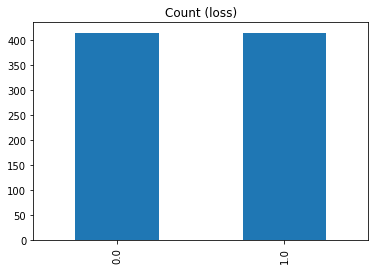

In [36]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Under sampling:')
print(df_test_under.loss.value_counts())

df_test_under.loss.value_counts().plot(kind='bar', title='Count (loss)')

In [37]:
df_test_under['loss'].value_counts()

0.0    415
1.0    415
Name: loss, dtype: int64

In [38]:
# Consider only a handful of features to start with; you can extend to the full set later on.
X = df_test_under.loc[:,'f1':'f778'].values


# Generate the labels; if 'loss' is zero the this indicates the negative class, class 0, i.e. no default;
# if 'loss' is possitive this indicates the positive class, class 1, i.e. there is a loan default;
#y = [ bool(y) for y in dfn.loc[:,'loss'].values ]
df_test_under['loss'].mask(df_test_under['loss'] == 0.0, 0, inplace=True)
df_test_under['loss'].mask(df_test_under['loss'] != 0.0, 1, inplace=True)
y = np.array(df_test_under["loss"])

In [39]:

# Split the data into train, validation, and test.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,random_state=112, stratify=y)

In [40]:
X_train1.shape,y_train1.shape,X_test1.shape

((622, 769), (622,), (208, 769))

In [41]:
type(y_train1),type(y_test1)


(numpy.ndarray, numpy.ndarray)

In [57]:
# YOUR CODE HERE
from sklearn.svm import SVC
# instantiate classifier with default hyperparameters
svc1=SVC(C=100)
# instantiate classifier with linear kernel 
svc2=SVC(kernel='sigmoid')
# instantiate classifier with polynomial kernel
svc3=SVC(kernel='poly',C=100)


# fit classifiers to training set
svc1.fit(X_train1, y_train1)


#Predictions based on models
y_pred_svc1 = svc1.predict(X_test1)



In [58]:
svc2.fit(X_train1, y_train1)




SVC(kernel='sigmoid')

In [59]:
y_pred_svc2 = svc2.predict(X_test1)

In [60]:
svc3.fit(X_train1, y_train1)



SVC(C=100, kernel='poly')

In [61]:
y_pred_svc3 = svc3.predict(X_test1)

In [62]:
#  classifier with default hyperparameters

accuracy_1_svm = accuracy(y_test1, y_pred_svc1)
precision_1_svm = precision(y_test1, y_pred_svc1)
recall_1_svm =recall(y_test1, y_pred_svc1)
f1_1_svm = f1(y_test1, y_pred_svc1)
print('Model accuracy score: {0:0.4f}'. format(accuracy(y_test1, y_pred_svc1)))
print('Model Precision score: {0:0.4f}'. format(precision(y_test1, y_pred_svc1)))
print('Model Recall score: {0:0.4f}'. format(recall(y_test1, y_pred_svc1)))
print('Model f1 score: {0:0.4f}'. format(f1(y_test1, y_pred_svc1)))


#  classifier with linear kernel
print('Model accuracy score: {0:0.4f}'. format(accuracy(y_test1, y_pred_svc2)))
print('Model Precision score: {0:0.4f}'. format(precision(y_test1, y_pred_svc2)))
print('Model Recall score: {0:0.4f}'. format(recall(y_test1, y_pred_svc2)))
print('Model f1 score: {0:0.4f}'. format(f1(y_test1, y_pred_svc2)))

accuracy_2_svm = accuracy(y_test1, y_pred_svc2)
precision_2_svm = precision(y_test1, y_pred_svc2)
recall_2_svm =recall(y_test1, y_pred_svc2)
f1_2_svm = f1(y_test1, y_pred_svc2)

#  classifier with poly kernel
accuracy_3_svm = accuracy(y_test1, y_pred_svc3)
precision_3_svm = precision(y_test1, y_pred_svc3)
recall_3_svm =recall(y_test1, y_pred_svc3)
f1_3_svm = f1(y_test1, y_pred_svc3)
print('Model accuracy score: {0:0.4f}'. format(accuracy(y_test1, y_pred_svc3)))
print('Model Precision score: {0:0.4f}'. format(precision(y_test1, y_pred_svc3)))
print('Model Recall score: {0:0.4f}'. format(recall(y_test1, y_pred_svc3)))
print('Model f1 score: {0:0.4f}'. format(f1(y_test1, y_pred_svc3)))




Model accuracy score: 0.5000
Model Precision score: 0.5000
Model Recall score: 0.0673
Model f1 score: 0.1186
Model accuracy score: 0.4856
Model Precision score: 0.4895
Model Recall score: 0.6731
Model f1 score: 0.5668
Model accuracy score: 0.4856
Model Precision score: 0.4927
Model Recall score: 0.9712
Model f1 score: 0.6537


In [63]:
# Construct table 
#Construct a table with each row being a different configuration of the 
# SVM algorithm (play with the regularization parameter, and the kernel function – use linear, poly, and rbf)
cols_svm=['kernel','Accuracy','Precision','Recall','F1-Score']

SVM_Table = pd.DataFrame(columns=cols_svm)
# List of series with same Index as datframe
listOfSeriesSVM = [pd.Series(['rbf', accuracy_1_svm,precision_1_svm,recall_1_svm,f1_1_svm], index=SVM_Table.columns ) ,
                pd.Series(['linear', accuracy_2_svm,precision_2_svm,recall_2_svm,f1_2_svm], index=SVM_Table.columns ) ,
                pd.Series(['poly', accuracy_3_svm,precision_3_svm,recall_3_svm,f1_3_svm], index=SVM_Table.columns )  
                ]
SVM_Table = SVM_Table.append(  listOfSeriesSVM,
                        ignore_index=True)
print('Table with different regularization parameters of SVM:\n') 
print(SVM_Table)

Table with different regularization parameters of SVM:

   kernel  Accuracy  Precision    Recall  F1-Score
0     rbf  0.500000   0.500000  0.067308  0.118644
1  linear  0.485577   0.489510  0.673077  0.566802
2    poly  0.485577   0.492683  0.971154  0.653722


<span style="color:blue">**Report**</span>

The Support Vector Classifiers were taking too long to train and predict on the complete dataset and the results were very poor. The primary reason for this poor performance was because of uneven distribution of data. Target class distribution was observed to be 10%-90%, to counter this problem of poor sampling, we downsized our data set to match number of 0's to Positive labels. After downsizing, we splitted the data in to training and testing datasets. 

We have trained and tested our classifiers by considering all features. The classifiers we used are,
1. Classifier with RBF kernel
2. Classifier with Linear kernel
3. Classifier with polynomial kernel

The accuracy of all models are nearly similar, but the Precision for 1st Classifier with rbf kernel performed slightly worse in Precision Perspective. The 2nd classifier with linear Kernel performed better in Recall and F1-score perspectives. 

But we will consider ***3rd classifier with poly kernel as better classifier*** because of its slightly better accuracy and balanced Precision, Recall and F1-scores. Accuracy is comparatively better and precision is perfect, Recall and F1 scores are relatively low but its a trade off between Precision and recall in our model. 

The overall performance in accuracy is not that good because of larger number of Contributing features i.e. 770+ features.


##### Neural Network (Lecture 5) (2pts)

+ Train and test a Neural Network model
    + Construct a table with each row being a different configuration of the network (play with the number of hidden layers, the number of neurons in each layer, and the activation function) and each column the evaluation measures
    + Report the performance of at least three different configurations
    + Explain your findings and select the optimal model
    + Justify your choice of different paramteres and architectures
    + Report the performance of the optimal model

In [64]:
X_test1.shape,X_train1.shape,y_train1.shape,y_test1.shape

((208, 769), (622, 769), (622,), (208,))

In [65]:

from sklearn.neural_network import MLPClassifier
# Create a classifier: Hidden Layers:5, activation: tanh, solver:sgd
classifier_5 = MLPClassifier(hidden_layer_sizes=(50,),activation='tanh',solver='sgd', alpha=0.0001)

# We learn the digits on the first half of the digits
classifier_5.fit(X_train1, y_train1)

# Now predict the value of the digit on the second half:
# Predicting the Test set results
y_pred_cl5 = classifier_5.predict(X_test1)


# Create a classifier: Hidden Layers:10, activation: relu, solver:adam
classifier_10 = MLPClassifier(hidden_layer_sizes=(100,),activation='relu',solver='adam', alpha=0.0001)

# We learn the digits on the first half of the digits
classifier_10.fit(X_train1, y_train1)

# Now predict the value of the digit on the second half:
# Predicting the Test set results
y_pred_cl10 = classifier_10.predict(X_test1)


# Create a classifier: Hidden Layers:1000, activation: identity, solver:lbfgs
classifier_20 = MLPClassifier(hidden_layer_sizes=(1000,),activation='identity',solver='lbfgs', alpha=0.0001)

# We learn the digits on the first half of the digits
classifier_20.fit(X_train1, y_train1)

# Now predict the value of the digit on the second half:
# Predicting the Test set results
y_pred_cl20 = classifier_20.predict(X_test1)




In [66]:
# Create a classifier: Hidden Layers:1000, activation: relu, solver:adam
classifier_10a = MLPClassifier(hidden_layer_sizes=(1000,),activation='relu',solver='adam', alpha=0.0001)

# We learn the digits on the first half of the digits
classifier_10a.fit(X_train1, y_train1)

# Now predict the value of the digit on the second half:
# Predicting the Test set results
y_pred_cl10a = classifier_10a.predict(X_test1)

accuracy_2_nna = accuracy(y_test1, y_pred_cl10a)
precision_2_nna = precision(y_test1, y_pred_cl10a)
recall_2_nna =recall(y_test1, y_pred_cl10a)
f1_2_nna = f1(y_test1, y_pred_cl10a)


In [67]:
#  classifier: Hidden Layers:50, activation: tanh, solver:sgd

accuracy_1_nn = accuracy(y_test1, y_pred_cl5)
precision_1_nn = precision(y_test1, y_pred_cl5)
recall_1_nn =recall(y_test1, y_pred_cl5)
f1_1_nn = f1(y_test1, y_pred_cl5)
print('Model accuracy score: {0:0.4f}'. format(accuracy(y_test1, y_pred_cl5)))
print('Model Precision score: {0:0.4f}'. format(precision(y_test1, y_pred_cl5)))
print('Model Recall score: {0:0.4f}'. format(recall(y_test1, y_pred_cl5)))
print('Model f1 score: {0:0.4f}'. format(f1(y_test1, y_pred_cl5)))


# classifier: Hidden Layers:100, activation: relu, solver:adam
print('Model accuracy score: {0:0.4f}'. format(accuracy(y_test1, y_pred_cl10)))
print('Model Precision score: {0:0.4f}'. format(precision(y_test1, y_pred_cl10)))
print('Model Recall score: {0:0.4f}'. format(recall(y_test1, y_pred_cl10)))
print('Model f1 score: {0:0.4f}'. format(f1(y_test1, y_pred_cl10)))

accuracy_2_nn = accuracy(y_test1, y_pred_cl10)
precision_2_nn = precision(y_test1, y_pred_cl10)
recall_2_nn =recall(y_test1, y_pred_cl10)
f1_2_nn = f1(y_test1, y_pred_cl10)

#  classifier: Hidden Layers:1000, activation: identity, solver:lbfgs
accuracy_3_nn = accuracy(y_test1, y_pred_cl20)
precision_3_nn = precision(y_test1, y_pred_cl20)
recall_3_nn =recall(y_test1, y_pred_cl20)
f1_3_nn = f1(y_test1, y_pred_cl20)
print('Model accuracy score: {0:0.4f}'. format(accuracy(y_test1, y_pred_cl20)))
print('Model Precision score: {0:0.4f}'. format(precision(y_test1, y_pred_cl20)))
print('Model Recall score: {0:0.4f}'. format(recall(y_test1, y_pred_cl20)))
print('Model f1 score: {0:0.4f}'. format(f1(y_test1, y_pred_cl20)))




Model accuracy score: 0.5288
Model Precision score: 0.5211
Model Recall score: 0.7115
Model f1 score: 0.6016
Model accuracy score: 0.5000
Model Precision score: 0.5000
Model Recall score: 1.0000
Model f1 score: 0.6667
Model accuracy score: 0.5000
Model Precision score: 0.5000
Model Recall score: 1.0000
Model f1 score: 0.6667


In [68]:
# Construct table 
# Construct a table with each row being a different configuration of the network 
# (play with the number of hidden layers, the number of neurons in each layer, and the activation function
cols_nn=['Hidden layers','activation','solver','Accuracy','Precision','Recall','F1-Score']

NeuralNetwork_Table = pd.DataFrame(columns=cols_nn)
# List of series with same Index as datframe
listOfSeriesNN = [pd.Series([50, 'tanh','sgd',accuracy_1_nn,precision_1_nn,recall_1_nn,f1_1_nn], index=NeuralNetwork_Table.columns ) ,
                pd.Series([100,'relu', 'adam',accuracy_2_nn,precision_2_nn,recall_2_nn,f1_2_nn], index=NeuralNetwork_Table.columns ) ,
                pd.Series([1000, 'identity','lbfgs', accuracy_3_nn,precision_3_nn,recall_3_nn,f1_3_nn], index=NeuralNetwork_Table.columns ),
                pd.Series([1000,'relu', 'adam',accuracy_2_nna,precision_2_nna,recall_2_nna,f1_2_nna], index=NeuralNetwork_Table.columns )  
                ]
NeuralNetwork_Table = NeuralNetwork_Table.append(  listOfSeriesNN,
                        ignore_index=True)
print('Table with different regularization parameters of Neural Network:\n') 
print(NeuralNetwork_Table)

Table with different regularization parameters of Neural Network:

  Hidden layers activation solver  Accuracy  Precision    Recall  F1-Score
0            50       tanh    sgd  0.528846   0.521127  0.711538  0.601626
1           100       relu   adam  0.500000   0.500000  1.000000  0.666667
2          1000   identity  lbfgs  0.500000   0.500000  1.000000  0.666667
3          1000       relu   adam  0.475962   0.487685  0.951923  0.644951


<span style="color:blue">**Report**</span>


The Neural Networks were taking too long to train and predict on the complete dataset and the results were very poor. The primary reason for this poor performance was because of uneven distribution of data. Target class distribution was observed to be 10%-90%, to counter this problem of poor sampling, we downsized our data set to match number of 0's to Positive labels. After downsizing, we splitted the data in to training and testing datasets. 

We have trained and tested our classifiers by considering all features. The classifiers we used are,
1. Classifier with Hidden Layers:50, activation: tanh, solver:sgd
2. Classifier with Hidden Layers:100, activation: relu, solver:adam
3. Classifier with Hidden Layers:1000, activation: identity, solver:lbfgs
4. Classifier with Hidden Layers:1000, activation: relu, solver:adam

The accuracy of all models are nearly similar, but the Precision for 3rd Classifier with lbfgs Solver performed  worst in Precision, Recall and F1-score perspectives. 

We will consider ***2nd classifier with with Hidden Layers:100, activation: relu, solver:adam*** because of its slightly better accuracy and balanced Precision and F1-scores. Recall score is perfect for this model. We have made another classifier with same regularization parameters with increased numbr of layers but the performance of both Relu models with 100 and 1000 hidden layers respectively is identical. So we will consider Relu model with lower number of layers because of lesser computation utilization. 

The overall performance in accuracy is not that good because of larger number of Contributing features i.e. 770+ features.

#### Compare Algorithms (2pts)
* Plot the Precision-Recall curves for the best model for each one of the above algorithms, Logistic Regression, Neural Nets, and SVM.
    * Use the precision_recall_curve from scikit-learn
* Explain your findings

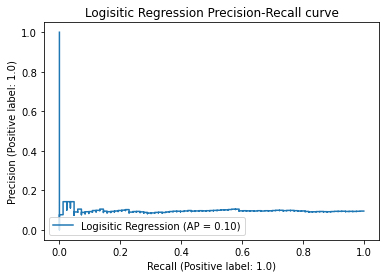

In [69]:
# YOUR CODE HERE
# Logistic Regression Precision Recall Display

from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    logreg3, X_test, y_test, name="Logisitic Regression"
)
_ = display.ax_.set_title("Logisitic Regression Precision-Recall curve")



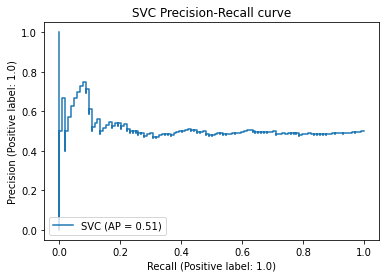

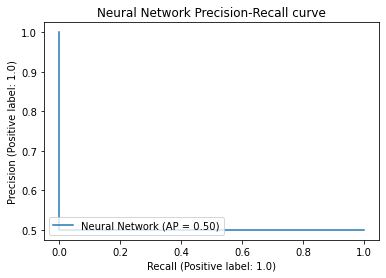

In [70]:
# SVM Precision Recall Display
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    svc3, X_test1, y_test1, name="SVC"
)
_ = display.ax_.set_title("SVC Precision-Recall curve")


#Neural Network Precision Recall Display
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier_10, X_test1, y_test1, name="Neural Network"
)
_ = display.ax_.set_title("Neural Network Precision-Recall curve")

<span style="color:blue">**Report**</span>

Precision-Recall is an important measure of performance measure of prediction when classes are very inbalanced. As in our case, our classes are very much inbalanced (10%-90%).

- Recall: Shows how many true relevant results are provided.
- Precision: Shows the Result Relevancy.

The precision recall curve indicates the trade-off between recall and precision to a different boundary. The high point at the bottom of the curve represents both high recall and high precision, where high precision is associated with a low false positive level, and high recall is related to a low false standard. High scores on both show that the editor returns correct results (high precision), as well as restoring most of all positive results (high recall).

A system with high recall but low precision returns many results, but many of its predicted labels are not accurate in comparison with training labels. A system with high precision but low recall is just the opposite, yielding very few results, but most of its predicted labels are good compared to training labels. Proper precision and high recall will return many results, with all the results labeled correctly.

In our models, **Support Vector Classifier**  performed better than other classifiers because of a better Precision Recall curve. The area under the curve for this model is grater as compared to other models. 